# Project: Reversing neural networks to find "best input" by inverting weights

# 1. Problem Statement

## 1.1 In words

Given a previously trained classification neural network, can we <ins>analytically</ins> reverse the weights of the neural network, using inverse matrices and inverse activations, to find the <ins>ideal</ins> input that produces the perfect output for each class?

We will try this for both a **Single-layer perceptron** and a **Multi-layer perceptron** , both trained on half the **MNIST handwritten digits** dataset.

The results will be compared against an empirical, pixel-by-pixel method of finding an <ins> ideal</ins> input.

## 2.2 In math

### 2.2.1: SLP

**Here is my model of SLP:**

$z = x \cdot A$

$y = softmax(z)$

**Where:**

$x \in \mathbb{R}^{784}$ : input vector

$A \in \mathbb{R}^{784\times 5}$ : trained weights

$b \in \mathbb{R}^{5}$ : biases

$y \in \mathbb{R}^{5}$ output (prediction), with one-hot encoding




#### Our goal: for n, find "ideal" $x'_n$, so that:

$z'_n = x'_n \cdot A$

$y'_n = softmax(z'_n)$

$y'_n \approx $ perfect. For example, for $n=2$, $y'_n \approx [0,0,1,0,0]$

### 2.2.2: MLP

   Relu: f(x) = x if x > 0, otherwise f(x) = 0
   
Leaky Relu: f(x) = x if x > 0, otherwise f(x) = 0.01x

**Here is my model of 2-hidden-layer MLP:**

$x \in \mathbb{R}^{784}$ : input vector

$h_1 = leakyrelu(x \cdot A_0 + b_0)$

$h_2 = leakyrelu(h_1 \cdot A_1 + b_1)$

$z = h_2 \cdot A_2 + b_2$

$y = softmax(z)$

**Where:**



$A_0, A_1, A_2$ : trained weights

$b_0, b_1, b_2$ : biases

$h_1, h_2$ : hidden layers

$z$: output of hidden layers

$y \in \mathbb{R}^{5}$ output (prediction), with one-hot encoding



#### Our goal:
Our goal is still the same. To find $x'_n$ so that $y'_n$ is perfect.

# 2. Preperation: Loading the data and training the models
This section is hidden because it's just code.

In [5]:
NUMBER_OF_NUMBERS = 5
from joblib import dump, load

import pandas as pd
import sklearn
import numpy as np

from sklearn.preprocessing import OneHotEncoder

from sklearn.neural_network import MLPClassifier

from scipy.special import softmax, expit, logit

from PIL import Image as im

import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import math
import matplotlib.pyplot as plt

In [12]:
mnist_train = pd.read_csv('mnist_train.csv')
mnist_train = mnist_train[mnist_train.label <= (NUMBER_OF_NUMBERS-1)]
mnist_array = np.array(mnist_train)
Xtrain, ytrain = mnist_array[:,1:], mnist_array[:,0]
Xtrain_normalized = Xtrain/127.5 - 1
onehot = OneHotEncoder()
ytrain_onehot = to_categorical(ytrain)

In [13]:
LEAKY_ALPHA = 0.01
mlp = Sequential()
mlp.add(Dense(30,  activation=tf.keras.layers.LeakyReLU(alpha=LEAKY_ALPHA)))
mlp.add(Dense(30, activation=tf.keras.layers.LeakyReLU(alpha=LEAKY_ALPHA)))
mlp.add(Dense(NUMBER_OF_NUMBERS))
mlp.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)
mlp.fit(Xtrain_normalized, ytrain_onehot, epochs=20*NUMBER_OF_NUMBERS)
!mkdir -p saved_model
mlp.save(f'saved_model/my_model_{NUMBER_OF_NUMBERS}')

Epoch 1/100
670/670 [==============================] - 1s 743us/step - loss: 0.1723 - categorical_accuracy: 0.9455
Epoch 2/100
670/670 [==============================] - 0s 699us/step - loss: 0.0854 - categorical_accuracy: 0.9731
Epoch 3/100
670/670 [==============================] - 0s 698us/step - loss: 0.0644 - categorical_accuracy: 0.9800
Epoch 4/100
670/670 [==============================] - 0s 693us/step - loss: 0.0554 - categorical_accuracy: 0.9832
Epoch 5/100
670/670 [==============================] - 1s 842us/step - loss: 0.0453 - categorical_accuracy: 0.9855
Epoch 6/100
670/670 [==============================] - 0s 706us/step - loss: 0.0387 - categorical_accuracy: 0.9878
Epoch 7/100
670/670 [==============================] - 0s 694us/step - loss: 0.0356 - categorical_accuracy: 0.9885
Epoch 8/100
670/670 [==============================] - 0s 708us/step - loss: 0.0329 - categorical_accuracy: 0.9890
Epoch 9/100
670/670 [==============================] - 1s 914us/step - loss: 0.0

INFO:tensorflow:Assets written to: saved_model/my_model_5/assets


INFO:tensorflow:Assets written to: saved_model/my_model_5/assets


In [14]:
slp = MLPClassifier(hidden_layer_sizes=(), verbose=1)
slp.fit(Xtrain_normalized, ytrain_onehot)
dump(slp,f'trained_normalized_slp_{NUMBER_OF_NUMBERS}')

Iteration 1, loss = 1.28633554
Iteration 2, loss = 0.52725041
Iteration 3, loss = 0.42080620
Iteration 4, loss = 0.37180152
Iteration 5, loss = 0.34355897
Iteration 6, loss = 0.32459605
Iteration 7, loss = 0.31190540
Iteration 8, loss = 0.30139658
Iteration 9, loss = 0.29545091
Iteration 10, loss = 0.28906946
Iteration 11, loss = 0.28304599
Iteration 12, loss = 0.27873061
Iteration 13, loss = 0.27408022
Iteration 14, loss = 0.27323926
Iteration 15, loss = 0.26763254
Iteration 16, loss = 0.26515784
Iteration 17, loss = 0.26367915
Iteration 18, loss = 0.26243229
Iteration 19, loss = 0.25995834
Iteration 20, loss = 0.25768161
Iteration 21, loss = 0.25653428
Iteration 22, loss = 0.25336445
Iteration 23, loss = 0.25269989
Iteration 24, loss = 0.25044467
Iteration 25, loss = 0.24851583
Iteration 26, loss = 0.24938642
Iteration 27, loss = 0.24593664
Iteration 28, loss = 0.24484306
Iteration 29, loss = 0.24487192
Iteration 30, loss = 0.24654780
Iteration 31, loss = 0.24256897
Iteration 32, los

/Users/laijl/opt/anaconda3/envs/mlproject/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


['trained_normalized_slp_5']

# 3. SLP

## 3.1 Baseline: Empirical (pixel by pixel) method

Method (Same for both SLP and MLP):

Given an n value in [0,1,2,3,4].

1. For every pixel i in [0,784):

    a) Create a test array where the pixel i is 1, and all 783 other pixels are 0.

    b) Use the model to predict a $y$ value for the test array. How close is it to the "perfect" $y'$ (for example, [0,1,0,0]?)

2. Rank every pixel by how good their individual predictions are

3. Make the pixels with the best predictions white, the next ones gray, then black.


#### Code

In [18]:
def display_dictionary_of_images(dic):
    %matplotlib inline

    for key in dic.keys():

        # Reshape the input vector from 1D 784 to 2D 28x28
        # And make it 8-bit 
        x_prime = dic[key]
        x_prime_reshaped = x_prime.reshape((28,28)).astype('uint8')

        # Use image module to turn the array into an image
        image = im.fromarray(x_prime_reshaped, mode='L')

        #Display the image
        plt.figure()
        plt.title(key)
        plt.imshow(np.asarray(image),cmap='Greys_r', vmin=0, vmax=255)


In [15]:
A, b = slp.coefs_[0], slp.intercepts_[0]

In [16]:
dic = {}

for i in range(NUMBER_OF_NUMBERS):
    goal_index = i
    def get_priority(index):
        test = np.zeros((784))
        test[index] = 1
        testtest = test@A+b
        goals = np.ones((NUMBER_OF_NUMBERS)) * -1

        goals[goal_index] = 1
        return sum(testtest * goals)
    ls = list(range(784))
    ls.sort(reverse=True, key=get_priority)

#     whites = np.array(ls[:150]) 
    x = np.zeros((784))
#     x[whites] = 255
    for j in range(255):
        x[ls[j]] = 255 - j
    dic[f'black and white number {i}'] = x

In [22]:
np.set_printoptions(formatter={'float': '{: 0.10f}'.format})

#### Results

Here are the results.

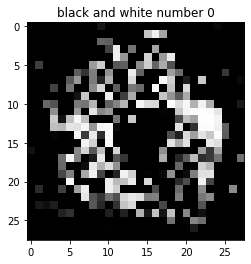

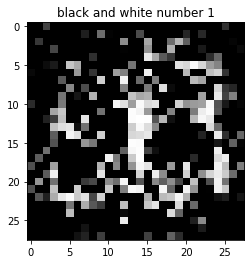

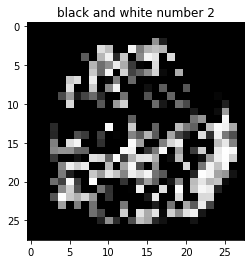

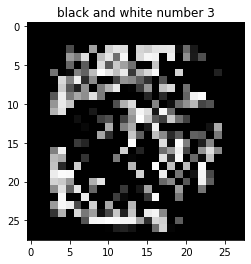

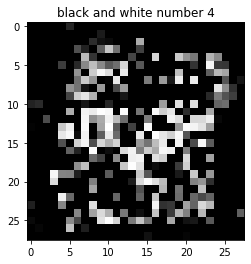

In [19]:
display_dictionary_of_images(dic)

## 3.2 The Analytical, inverse way!

### 3.2.1 What we did first: Defining an approximate $z'_n$

Recall: We want $y'_n$, which is softmax($z'_n$), to look like [0,1,0,0,0].

This is impossible, because for $y$ to be exactly that, $z$ would have to be [-inf, +inf, -inf,-inf,-inf]

So we made $z'_n$ to be $z'[n] = 10$ and $z'[i] = -1 \; \forall \; i \neq n$. Which looks like [-10, 10, -10, -10, -10]

As you can see below, this is very close:

In [24]:
z = [-10, 10, -10, -10, -10]
y = softmax(z)
print(y)

[ 0.0000000021  0.9999999918  0.0000000021  0.0000000021  0.0000000021]


That is almost perfect.

### 3.2.2 What we did next: Finding $A^+$

#### What is $A^+$.
Recall that we have $z' = x' \cdot A$.

It would be great if we know $A^{-1}$. Then we could just do $x' = z' \cdot A^{-1}$.

But an inverse, $A^{-1}$ doesn't exist. But "pseudo-inverse" $A^+$ does exist.

What $A^+$ means:

If $x = z \cdot A^{-1}$, then $x \approx z \cdot A^+$. More importantly, $A^{+}$ always exists and can be efficiently calculated by a computer, like so:

In [26]:
inv_A = np.linalg.pinv(A)
inv_A.shape

(5, 784)

### 3.2.3 Getting the answers: finding the $x'_n$ for all the n

For each $n$, we constructed $z'_n$ as seen previously, and got $x'_n$ by doing $z'_n \cdot A^+$.

#### Code

In [28]:
z_primes = []
for i in range(NUMBER_OF_NUMBERS):
    z_primes.append([-3000]*i + [3000] + [-3000]*(NUMBER_OF_NUMBERS - 1 -i))
z_primes
best_inputs = []

for z in z_primes:
    best_inputs.append((z)@inv_A)

best_inputs = np.array(best_inputs)
best_inputs = best_inputs - np.min(best_inputs)
best_inputs = best_inputs/np.max(best_inputs)*255
dictionary_of_x = {}
for i in range(len(best_inputs)):
    dictionary_of_x[f"best {i}"] = best_inputs[i]
    


#### Let's see what the analytically calculated x look like:

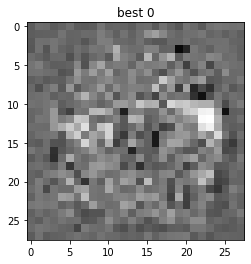

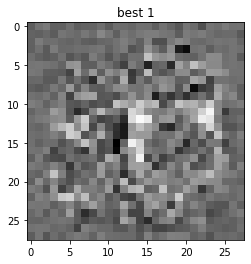

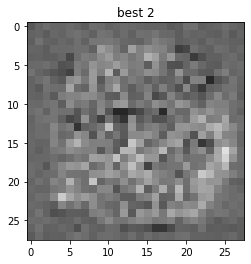

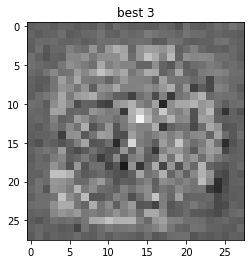

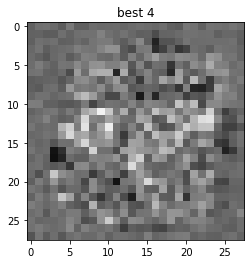

In [29]:
display_dictionary_of_images(dictionary_of_x)

They're pretty blurry, so let's try some filtering.

### 3.2.4: Filtering

Let's modify the inverse matrix so that it doesn't give us such a wide range of noisy values.

![](filter.png)

#### Code

In [30]:
def get_filtered_inputs(z_prime, inv_A, b, digit):
    
    
    percentiles = np.array([0,0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 0.98,  0.99, 0.995,1])
    percentile_indices = np.maximum((percentiles * np.size(inv_A)).astype(int) - 1, 0)

    cutoffs = np.sort(np.array(inv_A).ravel())[percentile_indices]

    global_min = np.min(z_prime@inv_A)
    global_range = np.max(z_prime@inv_A) - global_min
    
    def invert(cut_inv_A):
        return ((z_prime - b)@cut_inv_A)
    
    def scale(x):
        x = x - global_min
        x = x*255/global_range
        return x
    
    high_pass = {}
    high_pass_unscaled_list = []
    low_pass = {}
    low_pass_unscaled_list = []
    
    both_ends = {}
    middle = {}
#     print(cutoffs)
    
    for i in range(len(percentiles)):
        above_iA = filter_values(inv_A, cutoffs[i], 1)
        above_x = invert(above_iA)
        above_x_scaled = scale(above_x)
        
        high_pass[f"Digit {digit}, only above {cutoffs[i].round(3)} which is {percentiles[i]} percentile"] = above_x_scaled
        high_pass_unscaled_list.append(above_x)
        
        below_iA = filter_values(inv_A, cutoffs[i], 0)
        below_x = invert(below_iA)
        below_x_scaled = scale(below_x)
        low_pass[f"Digit {digit}, only below {cutoffs[i].round(3)} which is {percentiles[i]} percentile"] = below_x_scaled
        low_pass_unscaled_list.append(below_x)
        
    for i in range(math.ceil(len(percentiles)/2)):
        top_and_bottom = low_pass_unscaled_list[i] + high_pass_unscaled_list[-i-1]
        both_ends[f"Digit {digit}, top and bottom {percentiles[i]}"] = scale(top_and_bottom)
        
#         if i == 0:
#             print(f"cutoff low is {cutoffs[i]}, cutoff high is {cutoffs[-i-1]}")
#             print(f"Digit {None}, between top and bottom {percentiles[i]}")
        middle_iA = limit_values(inv_A, cutoffs[i], cutoffs[-i-1])
#         print(np.min(middle_iA),np.max(middle_iA))
        middle_x = invert(middle_iA)
        middle_x_scaled = scale(middle_x)
        middle[f"Digit {digit}, between top and bottom {percentiles[i]}"] = middle_x_scaled
    
    return high_pass, low_pass, both_ends, middle
        

# Set all values of the array that is either higher or lower than the cutoff to 0
def filter_values(array, cutoff, high_pass):
    array = np.copy(array)
    if high_pass:
        delete_indices = (array <= cutoff)
    else:
        delete_indices = (array > cutoff)
    array[delete_indices] = 0
    return array
def limit_values(array, cutoff_low, cutoff_high):
    array = np.maximum(array, cutoff_low)
    array = np.minimum(array, cutoff_high)
    return array

high_passes = []
low_passes = []
both_ends = []
middles = []

for i in range(NUMBER_OF_NUMBERS):
    high_pass_i, low_pass_i, both_ends_i, middle_i = get_filtered_inputs(z_primes[i], inv_A, b, i)
    high_passes.append(high_pass_i)
    low_passes.append(low_pass_i)
    both_ends.append(both_ends_i)
    middles.append(middle_i)

def get_dict_of_filtered_inputs(percentile_ends, percentile_middle):
    dic = {}
    for digit in range(NUMBER_OF_NUMBERS):
        if percentile_ends != None:
            string = f'Digit {digit}, top and bottom {percentile_ends}'
            dic[string] = both_ends[digit][f'Digit {digit}, top and bottom {percentile_ends}']
        if percentile_middle != None:
            string = f"Digit {digit}, between top and bottom {percentile_middle}"
            dic[string] = middles[digit][f"Digit {digit}, between top and bottom {percentile_middle}"]
    return dic
display_dictionary_of_images(get_dict_of_filtered_inputs(0.05, 0.2))

#### Results

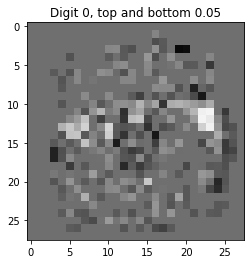

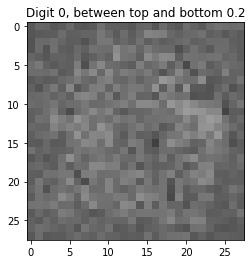

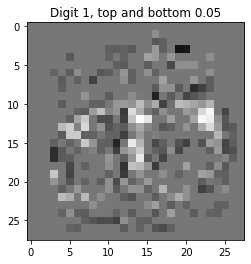

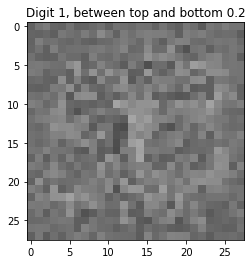

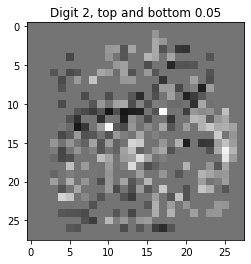

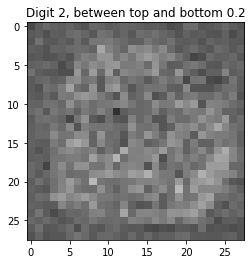

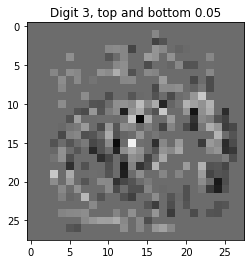

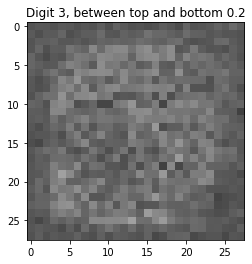

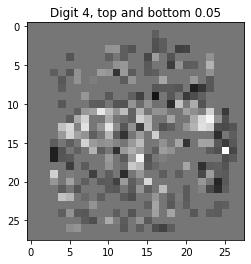

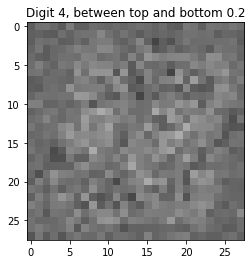

In [35]:
display_dictionary_of_images(get_dict_of_filtered_inputs(0.05, 0.2))

Disappointing. :(

# 4. MLP

We repeat the same procedure for MLP. 

Almost everything is the same, with one exception:

In MLP, we can't simply invert a weights matrix. Instead, we go back from the output and invert EVERY layer, in reverse order.

But first, we do the pixel-by-pixel method again:

## 4.1 Baseline (pixel by pixel method)

#### Code

In [36]:
weights = [layer.get_weights() for layer in mlp.layers]

As, bs = [],[]

for weight in weights:
    As.append(weight[0])
    bs.append(weight[1])

In [37]:
def mock_relu(X, alpha = 0.01):
    Y = X * 0.01
    return np.maximum(X,Y)

def anti_leakyrelu(X, alpha):
    def myfunc(x):
        if x >= 0:
            return x
        else:
            return x / alpha
    myfunc_vec = np.vectorize(myfunc)
    return myfunc_vec(X)


In [39]:
z_primes = []
for i in range(NUMBER_OF_NUMBERS):
    z_primes.append([-10]*i + [10] + [-10]*(NUMBER_OF_NUMBERS - 1 -i))


In [40]:
def reverse_z(z_prime, As, bs):
    z = z_prime
    for layer in [2,1,0]:
        z_old = z[:]
        if layer != len(As) - 1:
            z = anti_leakyrelu(z, LEAKY_ALPHA)
        z = z - bs[layer]
        inv_A = np.linalg.pinv(As[layer])
        z = z@inv_A
        
    return z
    

best_inputs_unscaled = []

for z in z_primes:
    best_inputs_unscaled.append(reverse_z(z, As,bs))

best_inputs_unscaled = np.array(best_inputs_unscaled)

In [41]:
def fake_predict(rando):
    x = rando
    for i in range(3):
        x = x@As[i]
        x = x + bs[i]
        if i != 2:
            x = mock_relu(x)
    return x

In [42]:
dic = {}

for i in range(NUMBER_OF_NUMBERS):
    goal_index = i
    def get_priority(index):
        test = np.zeros((784))
        test[index] = 1
        testtest = fake_predict(test)
        goals = np.ones((NUMBER_OF_NUMBERS)) * -1

        goals[goal_index] = 1
        return sum(testtest * goals)
    ls = list(range(784))
    ls.sort(reverse=True, key=get_priority)

#     whites = np.array(ls[:150]) 
    x = np.zeros((784))
#     x[whites] = 255
    for j in range(255):
        x[ls[j]] = 255 - j
    dic[f'black and white number {i}'] = x



#### Results

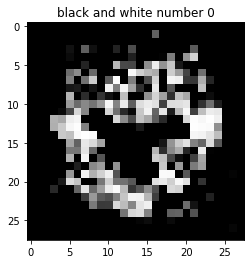

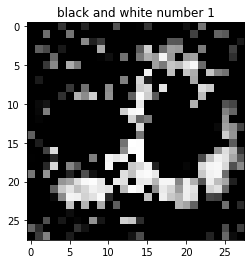

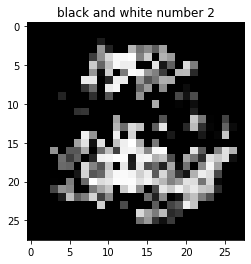

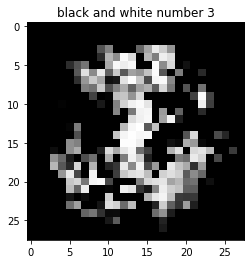

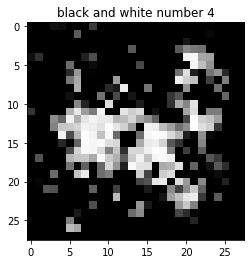

In [43]:
display_dictionary_of_images(dic)

## 4.2 Analytical method

#### code

In [49]:
best_inputs = best_inputs_unscaled - np.min(best_inputs_unscaled)
best_inputs = best_inputs/np.max(best_inputs)*255
dictionary_of_x = {}
for i in range(len(best_inputs)):
    dictionary_of_x[f"best {i}"] = best_inputs[i]
def display_dictionary_of_images(dic):
    %matplotlib inline

    for key in dic.keys():

        # Reshape the input vector from 1D 784 to 2D 28x28
        # And make it 8-bit 
        x_prime = dic[key]
        x_prime_reshaped = x_prime.reshape((28,28)).astype('uint8')

        # Use image module to turn the array into an image
        image = im.fromarray(x_prime_reshaped, mode='L')

        #Display the image
        plt.figure()
        plt.title(key)
        plt.imshow(np.asarray(image),cmap='Greys_r', vmin=0, vmax=255)

#### results

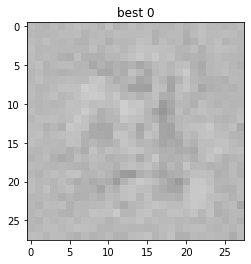

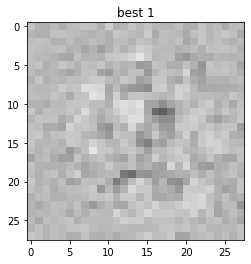

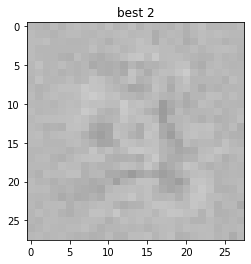

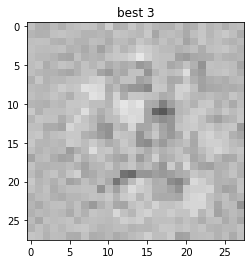

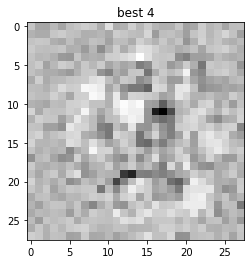

In [50]:
display_dictionary_of_images(dictionary_of_x)

4 looks like a lion

### 4.2.1 - Filtering is skipped for this, as it produced no interesting results

# 5. Conclusion and thoughts

In summary:

- Analytical method usually didn't work so well

- Baseline method (pixel by pixel) generated images that made more sense
    - Interestingly, baseline's superiority is greater in MLP, where it shouldn't be.

## 5.1 Possible explanations

- Analytical method is dominated by noise, in a way that the filtering couldn't remove.
- x space avaiable to the inverse is greater than IRL:
    - space (dimensions)
    - range